<a href="https://colab.research.google.com/github/1900690/heatmap_yolo/blob/main/image-heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[参考:https://github.com/rigvedrs/YOLO-V11-CAM/blob/main/YOLO_v11_EigenCAM.ipynb](https://github.com/rigvedrs/YOLO-V11-CAM/blob/main/YOLO_v11_EigenCAM.ipynb)

In [1]:
#@title 事前準備
!pip -q install ultralytics
!pip -q install ttach
import ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  # Suppress Matplotlib warnings

plt.rcParams["figure.figsize"] = [3.0, 3.0]

!git clone https://github.com/rigvedrs/YOLO-V11-CAM.git

%cd /content/YOLO-V11-CAM
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 15.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Cloning into 'YOLO-V11-CAM'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 115 (delta 13), reused 8 (delta 8), pack-reused 94 (from 1)
Receiving objects: 100% (115/115), 41.00 MiB | 22.38 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/YOLO-V11-CAM


In [2]:
#ライブラリをインポート(機能を使えるようにする)
import shutil
import os
from google.colab import files
import math


#すでにフォルダがある場合は消す
if os.path.exists("/content/datasets"):
  shutil.rmtree("/content/datasets")

#データをアップロード
#uploaded = files.upload()
#file_name = list(uploaded.keys())[0]
file_name ="syakuyaku500_20250116091727.zip"
#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
#zipを消す
os.remove('/content/'+file_name)

#オブジェクト検出

In [26]:
import glob
import os

model = YOLO('/content/tyuudannsitarasagatta.pt')
model = model.cpu()

os.makedirs('/content/combi', exist_ok=True)

file_list = sorted(glob.glob('/content/original/*.jpg'))

for filename in file_list:
    img = cv2.imread(filename)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    target_layers =[model.model.model[-2]]#[model.model.model[-2]]
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    comb_image=Image.fromarray(np.hstack((im, cam_image)))
    comb_image.save("/content/combi/"+os.path.basename(filename))


0: 640x640 1 OK, 1 NG, 3515.6ms
Speed: 2.8ms preprocess, 3515.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 NG, 4767.0ms
Speed: 3.3ms preprocess, 4767.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 3472.9ms
Speed: 3.2ms preprocess, 3472.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 3532.6ms
Speed: 3.5ms preprocess, 3532.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 1 NG, 4723.8ms
Speed: 3.4ms preprocess, 4723.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 1 NG, 3546.4ms
Speed: 3.4ms preprocess, 3546.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 3514.1ms
Speed: 5.1ms preprocess, 3514.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 4242.6ms
Speed: 4.3ms preprocess, 4242.6ms inference, 1.2ms postprocess per image 

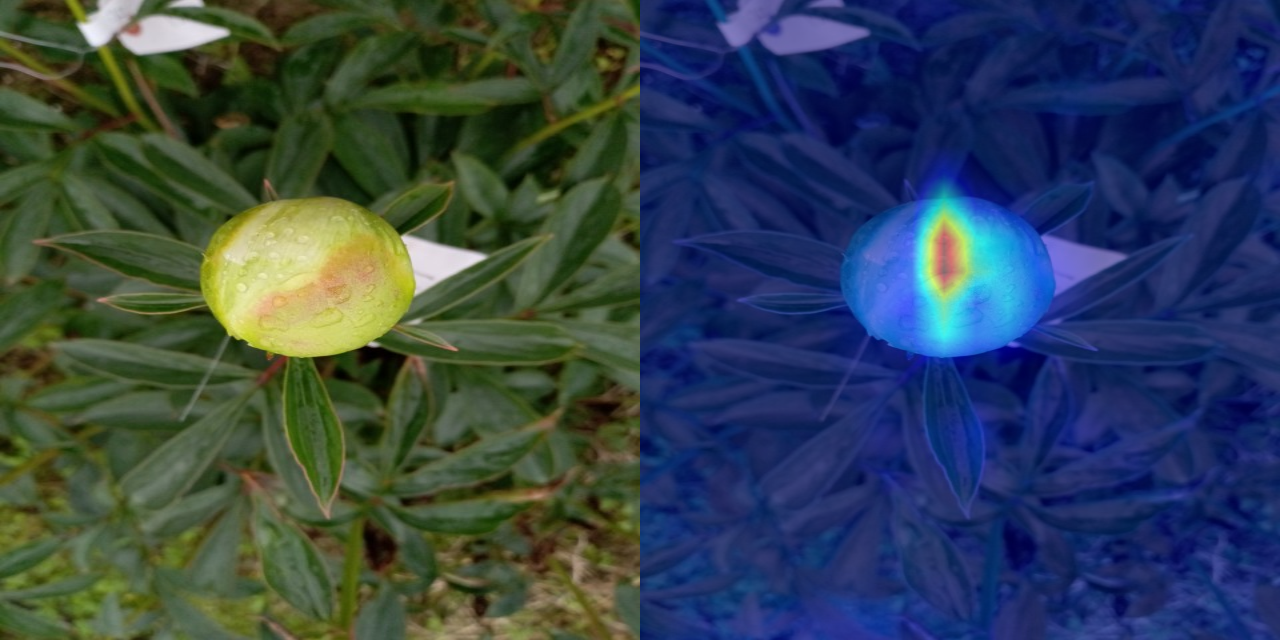

In [28]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

In [27]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/combi', 'zip', '/content/combi')

#ダウンロード
#files.download("/content/datasets.zip")

'/content/combi.zip'

#クラス分け

In [ ]:
img = cv2.imread('/content/NG/019 (2).jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255


0: 640x640 OK 0.68, NG 0.32, 225.5ms
Speed: 55.5ms preprocess, 225.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


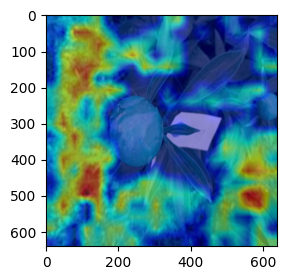

In [ ]:
model = YOLO('/content/11n.pt')
model = model.cpu()
target_layers =[model.model.model[-2]]
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 OK 0.68, NG 0.32, 57.2ms
Speed: 10.8ms preprocess, 57.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


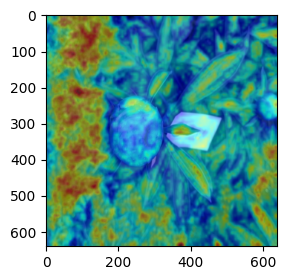

In [ ]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4],model.model.model[-5], model.model.model[-6], model.model.model[-7]]
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

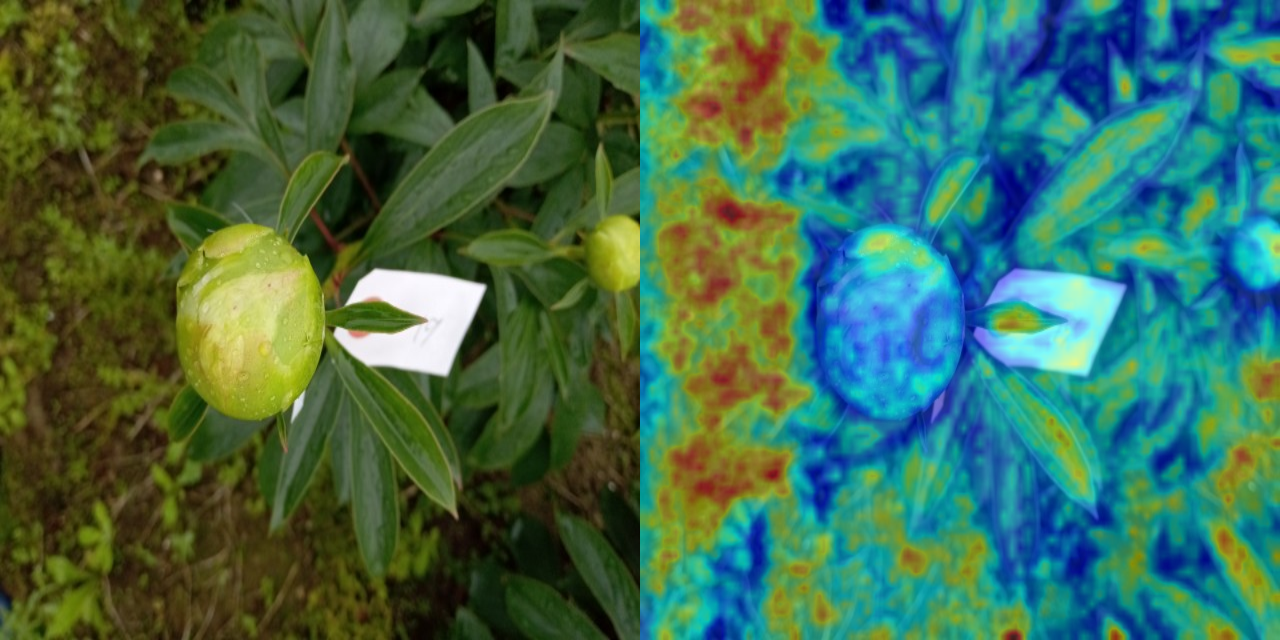

In [ ]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))